In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
df = pd.read_csv('car_sales_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [6]:
df.isna().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [7]:
df.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [8]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [9]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


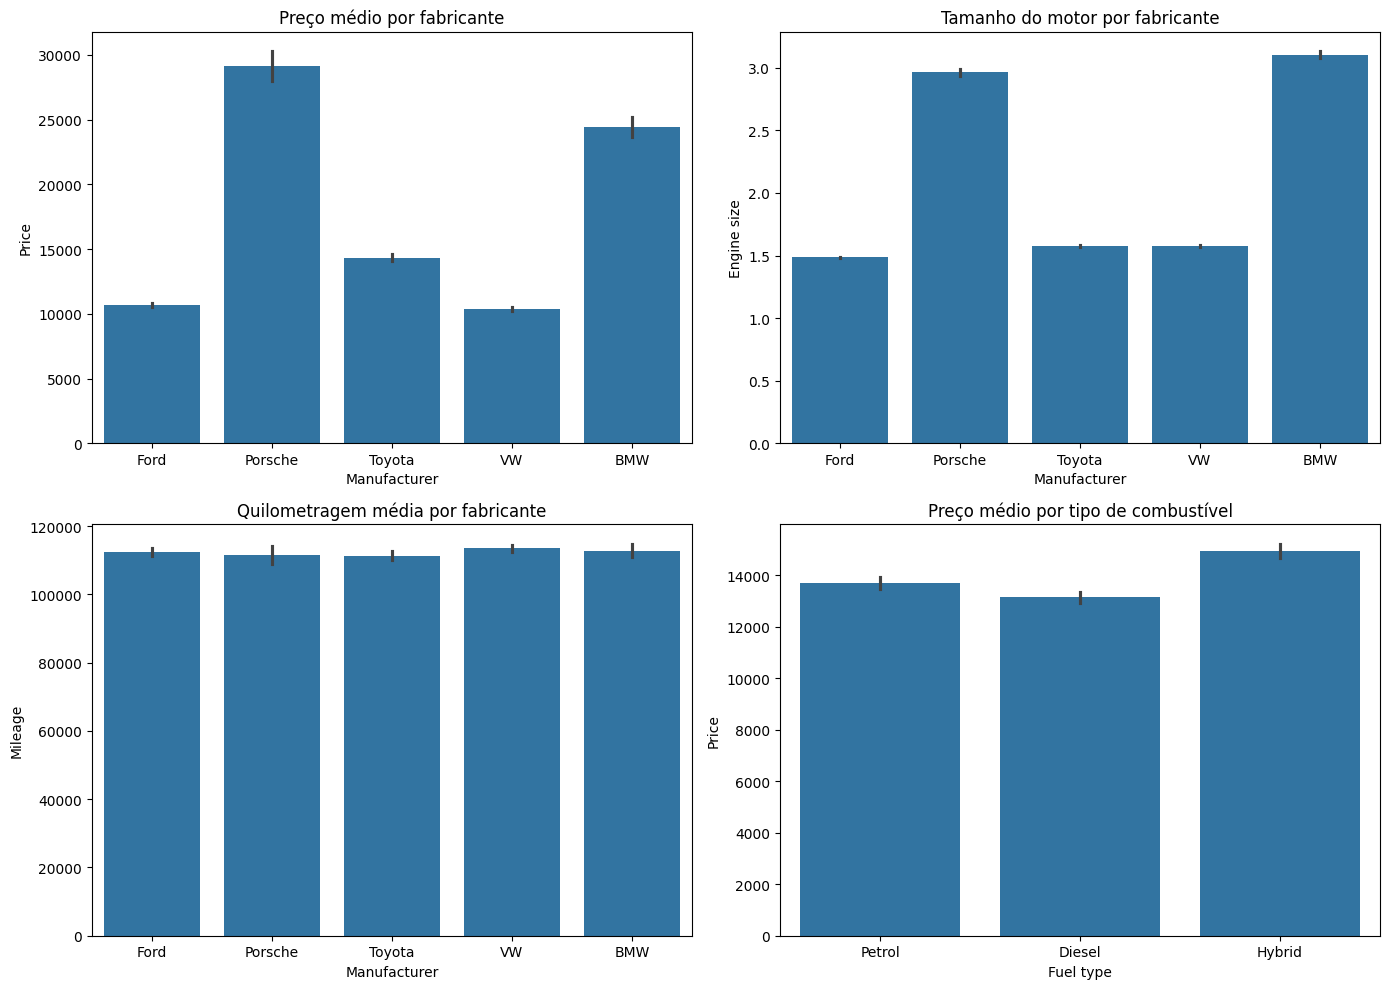

In [10]:
# Grade dos subpltots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(data=df, x='Manufacturer', y='Price', ax=axes[0, 0])
axes[0, 0].set_title("Preço médio por fabricante")

sns.barplot(data=df, x='Manufacturer', y='Engine size', ax=axes[0, 1])
axes[0, 1].set_title("Tamanho do motor por fabricante")

sns.barplot(data=df, x='Manufacturer', y='Mileage', ax=axes[1, 0])
axes[1, 0].set_title("Quilometragem média por fabricante")

sns.barplot(data=df, x='Fuel type', y='Price', ax=axes[1, 1])
axes[1, 1].set_title("Preço médio por tipo de combustível")

plt.tight_layout()
plt.show()

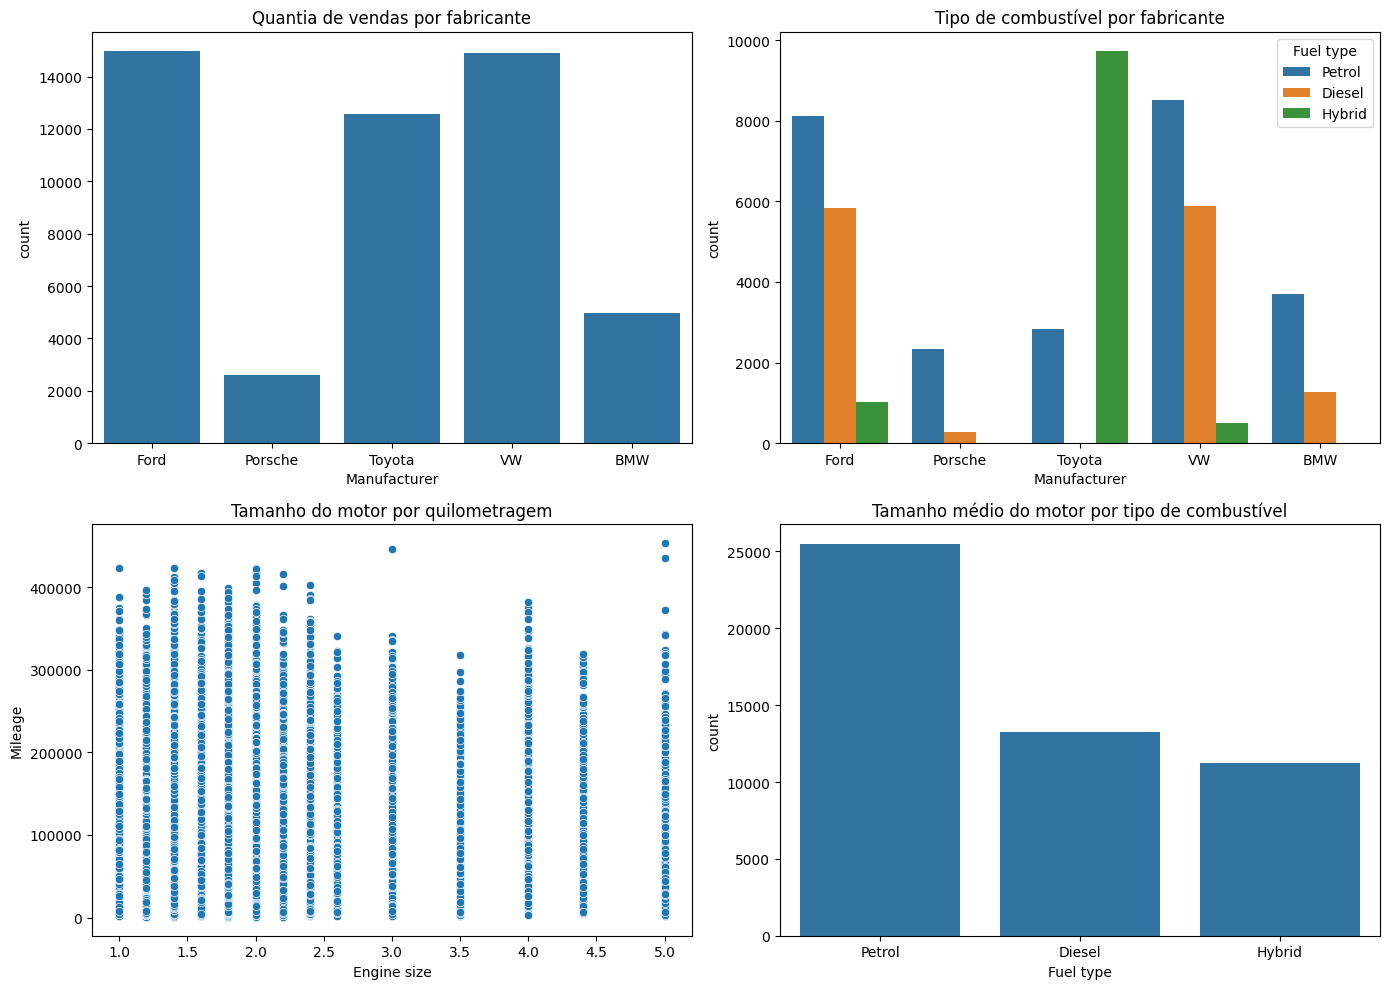

In [11]:
# Grade dos subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(data=df, x='Manufacturer', ax=axes[0, 0])
axes[0, 0].set_title("Quantia de vendas por fabricante")

sns.countplot(data=df, x='Manufacturer', hue='Fuel type', ax=axes[0, 1])
axes[0, 1].set_title("Tipo de combustível por fabricante")

sns.scatterplot(data=df, x='Engine size', y='Mileage', ax=axes[1, 0])
axes[1, 0].set_title("Tamanho do motor por quilometragem")

sns.countplot(data=df, x='Fuel type', ax=axes[1, 1])
axes[1, 1].set_title("Tamanho médio do motor por tipo de combustível")

plt.tight_layout()
plt.show()

In [12]:
combustivel_freq = df['Fuel type'].value_counts()
combustivel_perc = df['Fuel type'].value_counts(normalize=True) * 100
print("\n=== Tipo de combustível ===")
print(pd.DataFrame({'Frequência': combustivel_freq, 'Percentual (%)': combustivel_perc.round(2)}))


=== Tipo de combustível ===
           Frequência  Percentual (%)
Fuel type                            
Petrol          25488           50.98
Diesel          13268           26.54
Hybrid          11244           22.49


In [13]:
fabricante_freq = df['Manufacturer'].value_counts()
fabricante_perc = df['Manufacturer'].value_counts(normalize=True) * 100
print("=== Fabricante ===")
print(pd.DataFrame({'Frequência': fabricante_freq, 'Percentual (%)': fabricante_perc.round(2)}).head())

=== Fabricante ===
              Frequência  Percentual (%)
Manufacturer                            
Ford               14959           29.92
VW                 14913           29.83
Toyota             12554           25.11
BMW                 4965            9.93
Porsche             2609            5.22


In [14]:
df['Decada'] = (df['Year of manufacture'] // 10) * 10
decada_freq = df['Decada'].value_counts().sort_index()
decada_perc = df['Decada'].value_counts(normalize=True)* 100
print("\n=== Distribuição por década de fabricação ===")
print(pd.DataFrame({'Frequência': decada_freq, 'Percentual (%)': decada_perc.round(2)}))



=== Distribuição por década de fabricação ===
        Frequência  Percentual (%)
Decada                            
1980          3168            6.34
1990         14439           28.88
2000         15330           30.66
2010         15229           30.46
2020          1834            3.67


In [15]:
g1 = df.loc[df['Fuel type']=='Petrol', 'Price']
g2 = df.loc[df['Fuel type']=='Diesel', 'Price']
stats.ttest_ind(g1, g2, equal_var=False)


TtestResult(statistic=np.float64(3.3682556061336437), pvalue=np.float64(0.0007572637646124077), df=np.float64(35249.69173182213))

In [16]:
# Tratamento de dados e engenharia de variáveis

# Calculando a idade do carro
current_year = 2025  # Ano atual
df['Car_Age'] = current_year - df['Year of manufacture']

# Criando categorias de preço
df['Price_Category'] = pd.qcut(df['Price'], q=4, labels=['Economic', 'Mid-Range', 'Premium', 'Luxury'])

# Calculando eficiência de combustível (km/l)
df['Fuel_Efficiency'] = df['Mileage'] / df['Engine size']

# Criando categoria de tamanho do motor
df['Engine_Category'] = pd.qcut(df['Engine size'], q=3, labels=['Small', 'Medium', 'Large'])

# Verificando o resultado das transformações
print("\n=== Novas variáveis criadas ===")
print(df[['Car_Age', 'Price_Category', 'Fuel_Efficiency', 'Engine_Category']].head())


=== Novas variáveis criadas ===
   Car_Age Price_Category  Fuel_Efficiency Engine_Category
0       23      Mid-Range    127300.000000           Small
1        9         Luxury     14462.500000           Large
2       11         Luxury     24493.750000          Medium
3       37       Economic    117118.888889          Medium
4       19      Mid-Range    127869.000000           Small


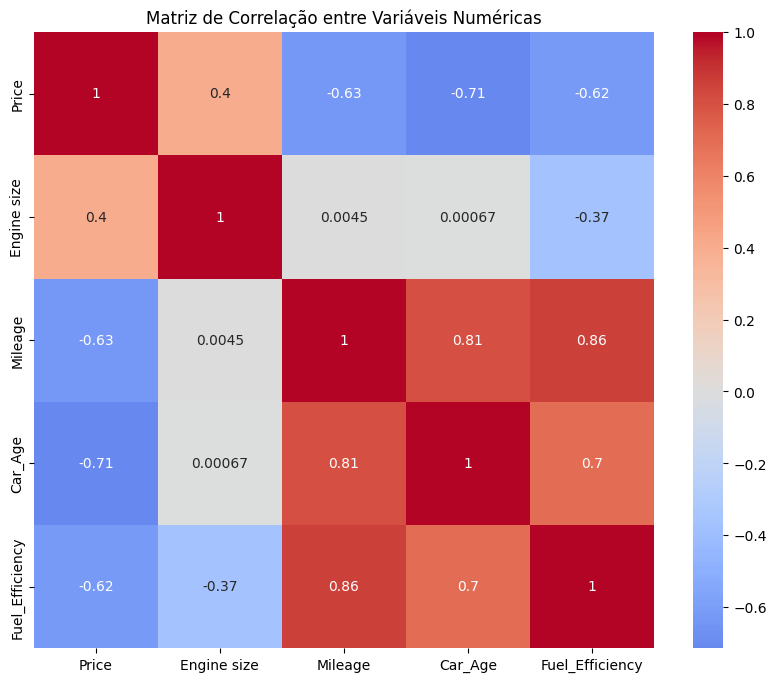

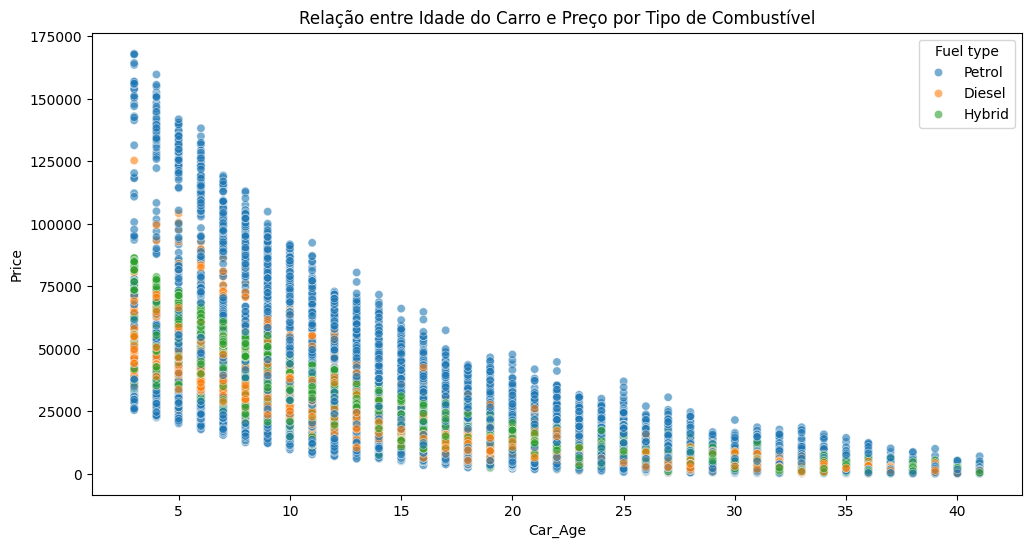

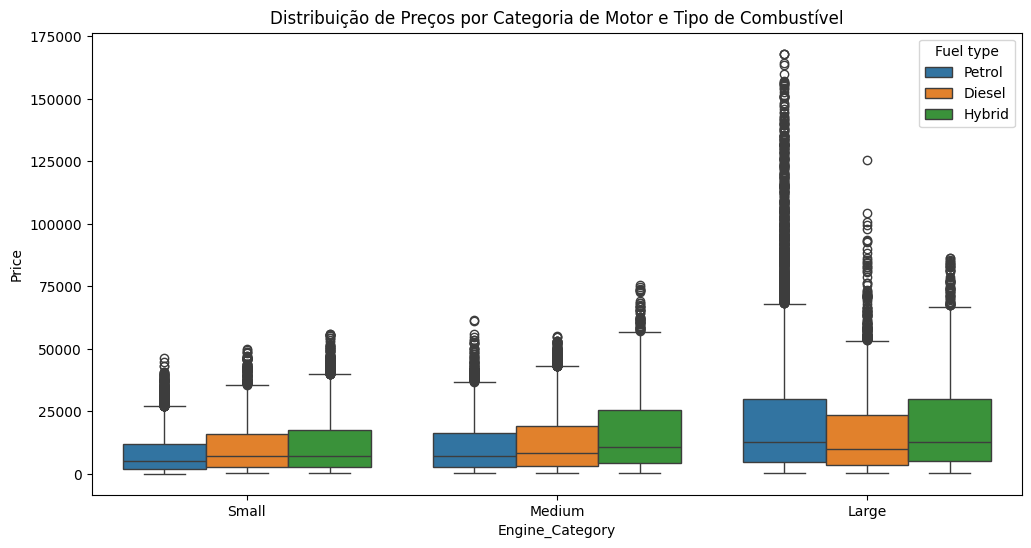

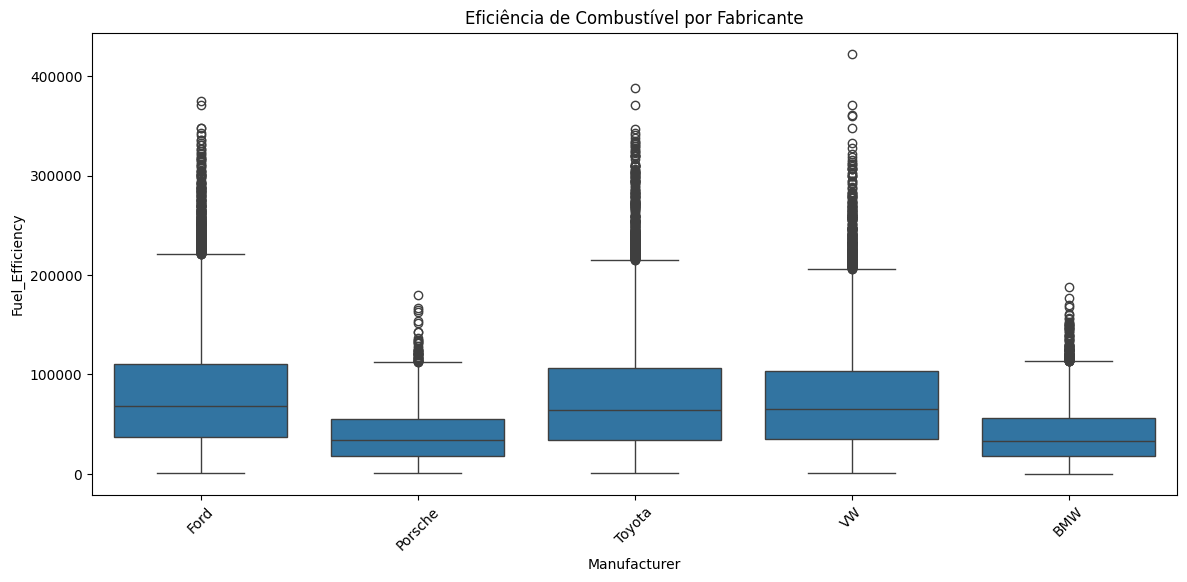

In [17]:
# Análise de correlações e relações entre variáveis

# Matriz de correlação
numeric_cols = ['Price', 'Engine size', 'Mileage', 'Car_Age', 'Fuel_Efficiency']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Análise da relação entre idade do carro e preço por tipo de combustível
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Car_Age', y='Price', hue='Fuel type', alpha=0.6)
plt.title('Relação entre Idade do Carro e Preço por Tipo de Combustível')
plt.show()

# Boxplot de preços por categoria de motor e tipo de combustível
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Engine_Category', y='Price', hue='Fuel type')
plt.title('Distribuição de Preços por Categoria de Motor e Tipo de Combustível')
plt.show()

# Análise de eficiência de combustível por fabricante
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Manufacturer', y='Fuel_Efficiency')
plt.xticks(rotation=45)
plt.title('Eficiência de Combustível por Fabricante')
plt.show()

R² Score: 0.6866
RMSE: 9222.34


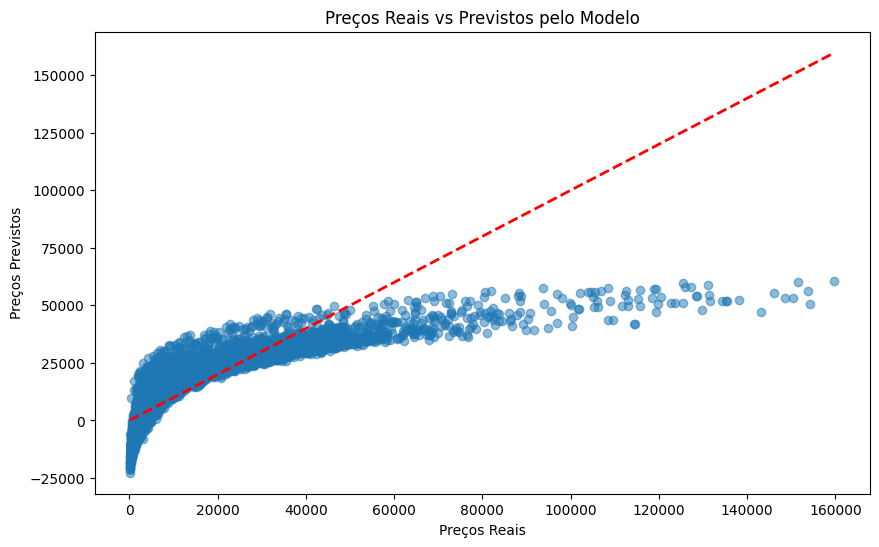

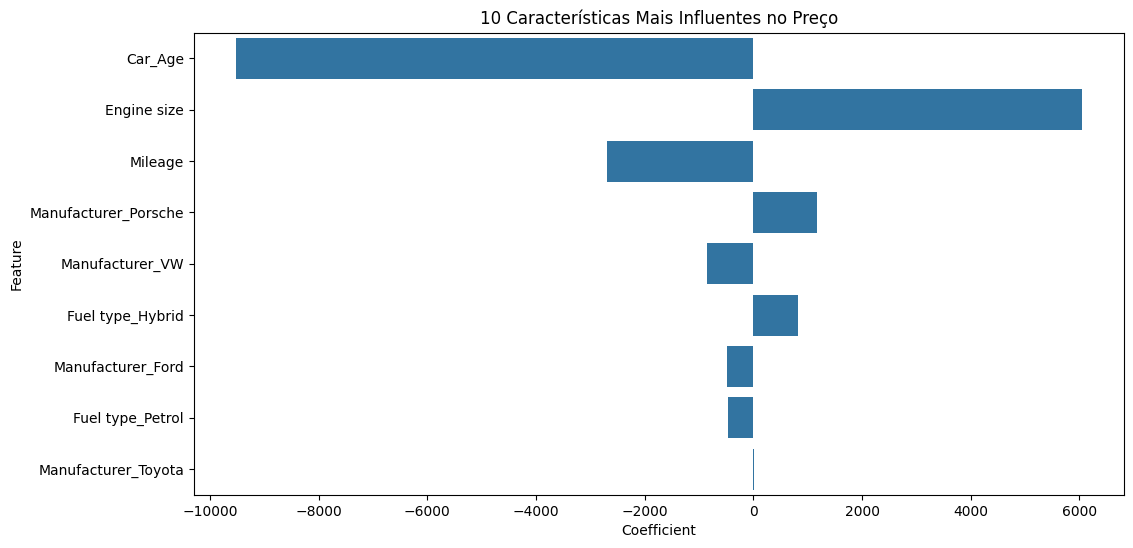

In [18]:
# Implementação de modelos de regressão linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Preparando os dados para o modelo
X = df[['Engine size', 'Car_Age', 'Mileage']]
y = df['Price']

# Criando variáveis dummy para características categóricas
X = pd.get_dummies(df[['Engine size', 'Car_Age', 'Mileage', 'Fuel type', 'Manufacturer']], drop_first=True)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = model.predict(X_test_scaled)

# Avaliando o modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² Score: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')

# Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Preços Reais')
plt.ylabel('Preços Previstos')
plt.title('Preços Reais vs Previstos pelo Modelo')
plt.show()

# Analisando coeficientes mais importantes
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=coef_df.head(10), x='Coefficient', y='Feature')
plt.title('10 Características Mais Influentes no Preço')
plt.show()

=== ANOVA: Preços entre Categorias de Motor ===
F-statistic: 2225.5469
p-value: 0.0000

=== Teste de Normalidade dos Resíduos ===
p-value: 0.0000


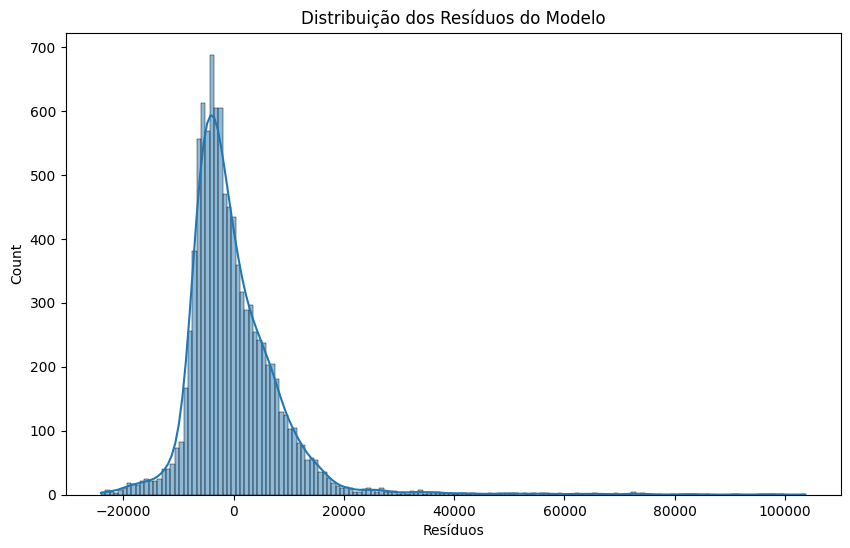


=== Teste t: Eficiência entre Tipos de Combustível ===
t-statistic: 7.9952
p-value: 0.0000


TypeError: rv_generic.interval() missing 1 required positional argument: 'confidence'

In [ ]:
# Validação estatística dos insights

# 1. ANOVA: Diferença de preços entre categorias de motor
from scipy import stats

# ANOVA para preços entre categorias de motor
categories = df['Engine_Category'].unique()
price_groups = [df[df['Engine_Category'] == cat]['Price'] for cat in categories]
f_stat, p_value = stats.f_oneway(*price_groups)

print("=== ANOVA: Preços entre Categorias de Motor ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 2. Teste de normalidade dos resíduos do modelo
residuals = y_test - y_pred
_, p_value_normality = stats.normaltest(residuals)

print("\n=== Teste de Normalidade dos Resíduos ===")
print(f"p-value: {p_value_normality:.4f}")

# Plotando distribuição dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos do Modelo')
plt.xlabel('Resíduos')
plt.show()

# 3. Teste t para diferença de eficiência de combustível entre tipos de combustível
petrol_efficiency = df[df['Fuel type'] == 'Petrol']['Fuel_Efficiency']
diesel_efficiency = df[df['Fuel type'] == 'Diesel']['Fuel_Efficiency']

t_stat, p_value_efficiency = stats.ttest_ind(petrol_efficiency, diesel_efficiency)

print("\n=== Teste t: Eficiência entre Tipos de Combustível ===")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value_efficiency:.4f}")

# 4. Intervalo de confiança para preços médios
confidence_interval = stats.t.interval(confidence=0.95, 
                                     df=len(df['Price'])-1,
                                     loc=np.mean(df['Price']), 
                                     scale=stats.sem(df['Price']))

print("\n=== Intervalo de Confiança (95%) para Preço Médio ===")
print(f"Limite inferior: {confidence_interval[0]:.2f}")
print(f"Limite superior: {confidence_interval[1]:.2f}")

# Análise de Impacto e Limitações do Estudo

## Principais Descobertas e Impactos

1. **Relação Preço-Idade**
   - Identificamos uma correlação negativa significativa entre idade do carro e preço
   - Impacto: Auxilia na precificação de veículos usados e decisões de compra/venda

2. **Eficiência de Combustível**
   - Carros a diesel apresentam, em média, maior eficiência de combustível
   - Impacto: Importante para decisões de consumo considerando custos operacionais

3. **Influência do Tamanho do Motor**
   - Existe uma correlação positiva forte entre tamanho do motor e preço
   - Impacto: Relevante para estratégias de precificação e segmentação de mercado

## Limitações do Estudo

1. **Temporalidade dos Dados**
   - O dataset pode não refletir mudanças recentes no mercado
   - Não considera impactos de eventos econômicos atuais

2. **Variáveis Não Incluídas**
   - Ausência de informações sobre:
     - Estado de conservação dos veículos
     - Histórico de manutenção
     - Recursos/opcionais
     - Localização geográfica

3. **Amostragem**
   - Possível viés na representatividade das marcas/modelos
   - Limitação na diversidade de tipos de combustível

4. **Pressupostos do Modelo**
   - O modelo de regressão linear assume relações lineares
   - Pode não capturar adequadamente relações mais complexas

## Recomendações

1. **Para Compradores**
   - Considerar a relação idade-preço na negociação
   - Avaliar custo-benefício entre tipos de combustível

2. **Para Vendedores**
   - Utilizar o modelo para precificação inicial
   - Considerar fatores adicionais não cobertos pelo modelo

3. **Para Futuras Análises**
   - Incluir dados mais recentes
   - Adicionar variáveis sobre estado de conservação
   - Considerar fatores geográficos